# MAE693 Reinforcement Learning and Control
## Homework 1
### Bernardo Martinez Rocamora Junior

First we need to import our libraries

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt

Then, let's start our environment and test a random state

In [4]:
# Define Environment
env = gym.make('Taxi-v3')
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Then, let us define our two Policy Iteration functions: Policy Evaluation and Policy Improvement.

In [5]:
# ---- Policy Evaluation ---
def policy_evaluation (env, policy, gamma, threshold, max_iterations):

    # Start evaluation by allocating value for all states as zeros
    value_matrix = np.zeros(env.env.nS)

    # Loop
    for iteration in range(max_iterations):

        # Initialize the maximum change of value across all states as zero
        max_value_change = 0

        # Find value for each state
        for state in range(env.env.nS):

            # Initialize value as zero
            state_value = 0
            
            # Sum cost+gamma*value(state+action) over all states, considering their probabilities
            for action in range(env.env.nA): 
                prob_action_given_state = policy[state][action]
                (prob_transition, next_state, reward, done) = env.env.P[state][action][0]
                state_value += prob_action_given_state * prob_transition * (reward + gamma * value_matrix[next_state])

            # Calculate the change of the value of this state
            value_change = np.abs(state_value - value_matrix[state])

            # Check if value change is greater than maximum value change ever recorded. If yes, substitute
            if (max_value_change < value_change):
                max_value_change = value_change

            # Update value for this state
            value_matrix[state] = state_value

        # Check if the maximum value change across all state is lesser than a certain threshold. If yes, return
        if (max_value_change < threshold): 
            break

    return value_matrix, iteration

# ---- Policy Improvement
def policy_improvement (env, policy, value_matrix, gamma):
    # Initialize flags
    found_optimum = False
    policy_stable = True

    # Run improvement for all states
    for state in range(env.env.nS):
        # Check what was the best action using old policy for this state
        prior_best_action = np.argmax(policy[state])

        # Using the new value matrix, store values across all actions for this state
        action_values = np.zeros(env.env.nA)
        for action in range(env.env.nA): 
            (prob_transition, next_state, reward, done) = env.env.P[state][action][0]
            action_values[action] += prob_transition * (reward + gamma * value_matrix[next_state])

        # Check the new best action from the stored values
        best_action = np.argmax(action_values)

        # If the old best action and new best action are different, change the flag to false
        # so that the algorithm knows that the optimal policy has not been found yet
        if prior_best_action != best_action:
            policy_stable = False

        # Update the policy with the new best action
        policy[state] = np.eye(env.env.nA)[best_action]

    # Return that the optimum was found if all old best actions were the same as the new
    if policy_stable:
        found_optimum = True
        return policy, found_optimum    

    return policy, found_optimum

Next, let's define a policy to start with.

In [6]:
# Let's create a policy for which all actions have the same probability of happening 
policy = np.ones([env.env.nS, env.env.nA]) / env.env.nA

Now, we iterate and train our policy

In [7]:
while True:
    # Evaluate policy
    V,iteration = policy_evaluation (env, policy, 0.95, 0.000001, 10000)

    # Improve policy
    policy, found_optimum = policy_improvement (env, policy, V, 0.95)

    # Check finishing condition
    if (found_optimum == True):
        break

Let us evaluate the policy once more to obtain the Value function

In [8]:
V,iteration = policy_evaluation (env, policy, 0.95, 0.000001, 10000)

And plot this value function

Text(0.5, 0, 'State')

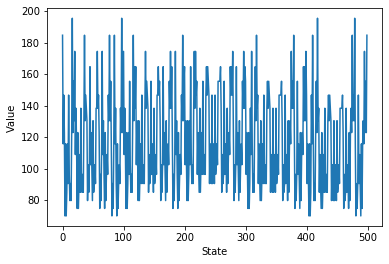

In [9]:
plt.plot(V)
plt.ylabel('Value') 
plt.xlabel('State') 

Finally, let's test the policy we found on a random enviroment

In [10]:
# Start simulation with random starting configuration
state = env.reset()

while True:
    # Step the simulation
    state, reward, done, info = env.step(np.argmax(policy[state])) 

    # Update the state
    env.env.s = state

    # Render the simulation
    env.render()

    # Check finish condition
    if (reward == 20):
        break

print("Mission complete!")  

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y